# Pegando certas estatisticas e fazendo cortes no data frame

In [1]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#dataframe of songs
df = pd.read_csv(
    'top_songs.csv')
df.drop('index',1,inplace=True)
df.head()

,song_id,listen_count,artist,title
0,SOBONKR12A58A7A7E0,40619,Dwight Yoakam,You're The One
1,SOAUWYT12A81C206F1,36059,Björk,Undo
2,SOSXLTC12AF72A7F54,30391,Kings Of Leon,Revelry
3,SOEGIYH12A6D4FC0E3,21953,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
4,SOFRQTD12A81C233C0,21646,Harmonia,Sehr kosmisch


In [2]:
df.describe()

,listen_count
count,10000.000000
mean,367.450200
std,962.579141
min,12.000000
25%,114.000000
50%,192.000000
75%,355.000000
max,40619.000000


In [3]:
mean = df.describe()['listen_count']['mean']
df_above_mean = df[ df['listen_count'] >=mean*8]
df_above_mean.tail()

,song_id,listen_count,artist,title
103,SOAFTRR12AF72A8D4D,3048,Daft Punk,Harder Better Faster Stronger
104,SOFRCGW12A81C21EA6,3034,Plain White T's,Hey There Delilah
105,SOIZLKI12A6D4F7B61,3024,Muse,Supermassive Black Hole (Twilight Soundtrack V...
106,SOVDLZN12AB0185BEA,3019,The Black Keys,Tighten Up
107,SONHWUN12AC468C014,2970,Fisher,Rianna


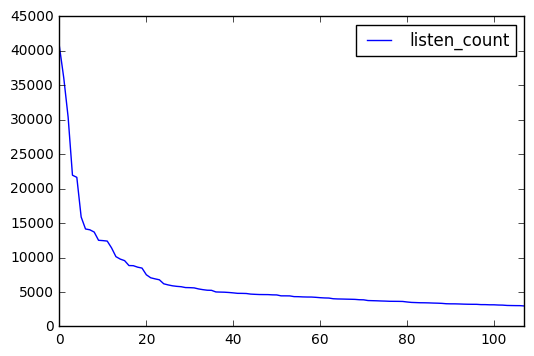

In [4]:
df_above_mean.plot()
plt.show()

In [5]:
#podemos empurrar todos os valores para frente ou para tras
df['foward'] = df['listen_count'].shift(1)
#df['tras'] = df['listen_count'].shift(-1)

#usamos mapping para criar novas colunas
df['diference'] = list(map(lambda x,y : x-y, df['foward'],df['listen_count']))

In [6]:
df.head()

,song_id,listen_count,artist,title,foward,diference
0,SOBONKR12A58A7A7E0,40619,Dwight Yoakam,You're The One,NaN,NaN
1,SOAUWYT12A81C206F1,36059,Björk,Undo,40619.0,4560.0
2,SOSXLTC12AF72A7F54,30391,Kings Of Leon,Revelry,36059.0,5668.0
3,SOEGIYH12A6D4FC0E3,21953,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,30391.0,8438.0
4,SOFRQTD12A81C233C0,21646,Harmonia,Sehr kosmisch,21953.0,307.0


In [7]:
#podemos usar uma funcao tomando uma janela no dataframe, nesse caso 2
df['sum'] = pd.rolling_apply(df['listen_count'],2,lambda x : np.sum(x))

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  from ipykernel import kernelapp as app


In [8]:
df.head()

,song_id,listen_count,artist,title,foward,diference,sum
0,SOBONKR12A58A7A7E0,40619,Dwight Yoakam,You're The One,NaN,NaN,NaN
1,SOAUWYT12A81C206F1,36059,Björk,Undo,40619.0,4560.0,76678.0
2,SOSXLTC12AF72A7F54,30391,Kings Of Leon,Revelry,36059.0,5668.0,66450.0
3,SOEGIYH12A6D4FC0E3,21953,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,30391.0,8438.0,52344.0
4,SOFRQTD12A81C233C0,21646,Harmonia,Sehr kosmisch,21953.0,307.0,43599.0


In [9]:
df.tail()

,song_id,listen_count,artist,title,foward,diference,sum
9995,SOFFCOP12A8C1422E3,18,Neutral Milk Hotel,Marching Theme,18.0,0.0,36.0
9996,SOOUXUD12AB0188D97,17,Sleater-kinney,Jumpers (Album),18.0,1.0,35.0
9997,SOBZVFU12A6702162C,16,Rilo Kiley,Accidntel Deth (Album Version),17.0,1.0,33.0
9998,SOBDQMB12AB0189045,14,William Tabbert,Younger Than Springtime,16.0,2.0,30.0
9999,SOPWWHY12A58A7B015,12,Sleater-kinney,Hubcap,14.0,2.0,26.0


In [10]:
x = np.array(df['listen_count'])

In [11]:
teste = df[['listen_count', 'diference']]

In [12]:
teste.head()

,listen_count,diference
0,40619,NaN
1,36059,4560.0
2,30391,5668.0
3,21953,8438.0
4,21646,307.0


In [13]:
teste.fillna(value=0,inplace=True)

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [14]:
#transformando um data frame em uma matrix de numpy
x = teste.as_matrix()

In [15]:
x[0:10]

array([[ 40619.,      0.],
       [ 36059.,   4560.],
       [ 30391.,   5668.],
       [ 21953.,   8438.],
       [ 21646.,    307.],
       [ 15889.,   5757.],
       [ 14149.,   1740.],
       [ 14029.,    120.],
       [ 13701.,    328.],
       [ 12506.,   1195.]])